# Загружаем необходимые библиотеки и инструменты

In [82]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Log
import seaborn as sns
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [83]:
df = pd.read_csv('creditcard.csv')

In [84]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [85]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219902.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,...,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000,219901.000000
mean,76711.139994,-0.075333,-0.010083,0.218796,0.052687,-0.074075,0.034776,-0.030965,0.005533,0.004797,...,-0.008171,-0.029120,-0.011377,0.001606,0.043929,0.003507,0.000529,0.002123,90.653311,0.001846
std,38225.475988,1.926909,1.647101,1.478182,1.408185,1.369190,1.318649,1.224617,1.207804,1.126640,...,0.744141,0.704469,0.621706,0.605242,0.503728,0.487088,0.398983,0.330836,250.594848,0.042929
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,46713.250000,-0.951604,-0.594653,-0.509174,-0.816060,-0.757524,-0.725924,-0.569370,-0.192259,-0.661398,...,-0.225914,-0.534217,-0.167744,-0.347464,-0.264600,-0.331208,-0.069041,-0.046385,6.000000,0.000000
50%,71612.500000,-0.047506,0.071512,0.404382,0.051985,-0.133960,-0.232694,0.005158,0.035236,-0.069001,...,-0.036972,-0.017313,-0.024718,0.048736,0.083229,-0.060696,0.004120,0.016643,23.310000,0.000000
75%,117080.500000,1.235139,0.781059,1.171378,0.850298,0.516394,0.436096,0.526210,0.332748,0.617666,...,0.164254,0.459694,0.123617,0.425593,0.376710,0.254696,0.089131,0.078156,79.940000,0.000000
max,141928.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219902 entries, 0 to 219901
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    219902 non-null  float64
 1   V1      219901 non-null  float64
 2   V2      219901 non-null  float64
 3   V3      219901 non-null  float64
 4   V4      219901 non-null  float64
 5   V5      219901 non-null  float64
 6   V6      219901 non-null  float64
 7   V7      219901 non-null  float64
 8   V8      219901 non-null  float64
 9   V9      219901 non-null  float64
 10  V10     219901 non-null  float64
 11  V11     219901 non-null  float64
 12  V12     219901 non-null  float64
 13  V13     219901 non-null  float64
 14  V14     219901 non-null  float64
 15  V15     219901 non-null  float64
 16  V16     219901 non-null  float64
 17  V17     219901 non-null  float64
 18  V18     219901 non-null  float64
 19  V19     219901 non-null  float64
 20  V20     219901 non-null  float64
 21  V21     21

In [87]:
df.isna().sum()

Time      0
V1        1
V2        1
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Видно, что у нескольких признаков присутствует одно пропущенное значение

Визаульно можно определить, что это последняя строка датафрейма

Удалим ее

In [88]:
df.iloc[-1]

Time      14192.0
V1            NaN
V2            NaN
V3            NaN
V4            NaN
V5            NaN
V6            NaN
V7            NaN
V8            NaN
V9            NaN
V10           NaN
V11           NaN
V12           NaN
V13           NaN
V14           NaN
V15           NaN
V16           NaN
V17           NaN
V18           NaN
V19           NaN
V20           NaN
V21           NaN
V22           NaN
V23           NaN
V24           NaN
V25           NaN
V26           NaN
V27           NaN
V28           NaN
Amount        NaN
Class         NaN
Name: 219901, dtype: float64

In [89]:
df = df.iloc[:-1]

# Проведем визуальный анализ

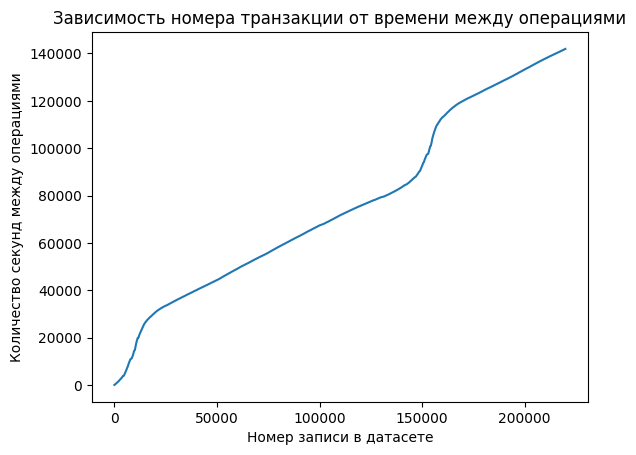

In [90]:
df.Time.plot()
plt.xlabel('Номер записи в датасете')
plt.ylabel('Количество секунд между операциями')
plt.title('Зависимость номера транзакции от времени между операциями')
plt.show()

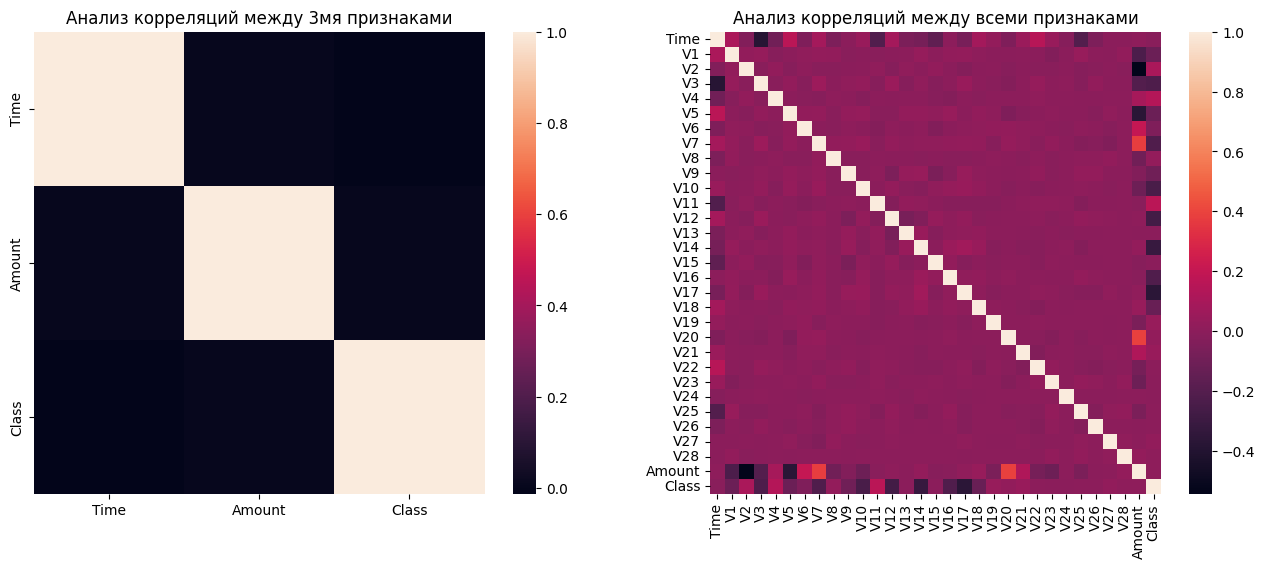

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
ax[0].set_title('Анализ корреляций между 3мя признаками')
sns.heatmap(df[['Time', 'Amount','Class']].corr(), ax = ax[0])
sns.heatmap(df.corr(), ax = ax[1])
ax[1].set_title('Анализ корреляций между всеми признаками')
plt.show()

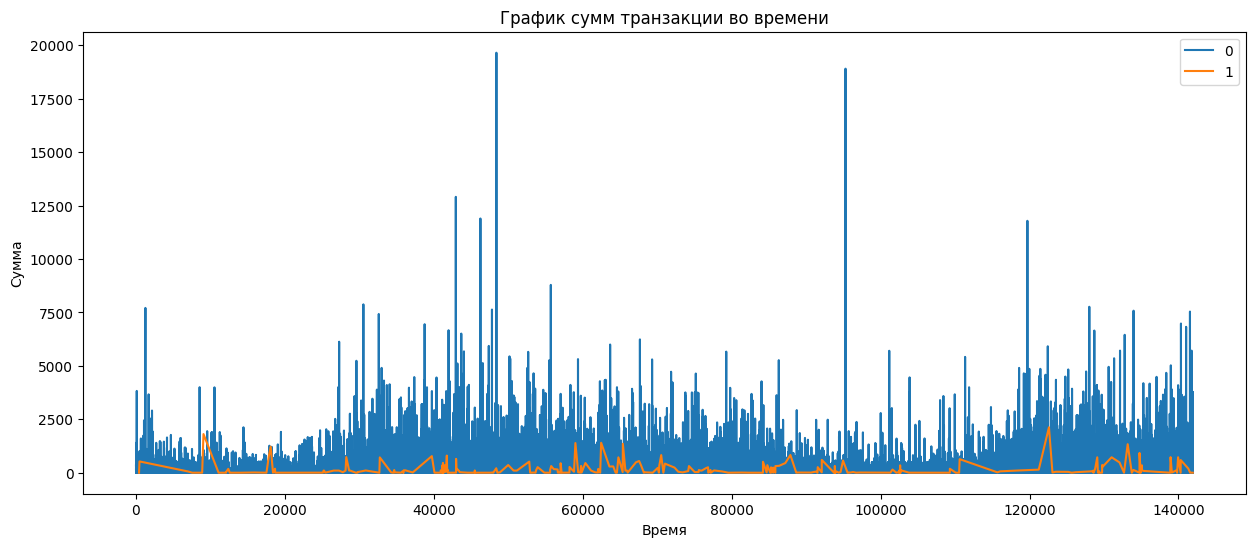

In [92]:
plt.figure(figsize=(15,6))
plt.plot(df.Time.loc[df.Class==0], df.Amount.loc[df.Class==0])
plt.plot(df.Time.loc[df.Class==1], df.Amount.loc[df.Class==1])
plt.xlabel('Время')
plt.ylabel('Сумма')
plt.title('График сумм транзакции во времени')
plt.legend('01')
plt.show()

Из графика выше можно сделать вывод о том, что мошеннические операции по картам проихводятся с небольшими суммами

In [93]:
df.Class.value_counts()

0.0    219495
1.0       406
Name: Class, dtype: int64

In [94]:
len(df.Class)/sum(df.Class)

541.628078817734

Сбалансируем классы перед обучением модели

In [96]:
df = pd.concat([df.loc[df.Class==1], df.loc[df.Class==0].sample(len(df.loc[df.Class==1]))] )

In [95]:
df1 = df.copy()

## Обучение модели


In [99]:
mod1 =HistGradientBoostingClassifier()

In [100]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Class'), df.Class, test_size=0.3)

In [101]:
mod1.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [102]:
ypr1=mod1.predict(X_test)

In [103]:
accuracy_score(ypr1, y_test), precision_score(ypr1, y_test), recall_score(ypr1, y_test)

(0.9549180327868853, 0.9465648854961832, 0.96875)

In [76]:
from sklearn.linear_model import LogisticRegression
ypr2 = LogisticRegression().fit(X_train, y_train).predict(X_test)
accuracy_score(ypr2, y_test), precision_score(ypr2, y_test), recall_score(ypr2, y_test)

(0.9452054794520548, 0.9090909090909091, 0.967741935483871)

In [77]:
from sklearn.svm import SVC
ypr3 = SVC().fit(X_train, y_train).predict(X_test)
accuracy_score(ypr3, y_test), precision_score(ypr3, y_test), recall_score(ypr3, y_test)

(0.5799086757990868, 0.46464646464646464, 0.5411764705882353)

In [78]:
from sklearn.tree import DecisionTreeClassifier
ypr4 = DecisionTreeClassifier().fit(X_train, y_train).predict(X_test)
accuracy_score(ypr4, y_test), precision_score(ypr4, y_test), recall_score(ypr4, y_test)

(0.9497716894977168, 0.9393939393939394, 0.9489795918367347)

Как видно из результатов, модель решающего дерева справляется лучше всего. Ближайшая по качеству - модель регрессии


Возьмем строки с немошенническими операциями и проверим качество моедли на них

In [109]:
test = df1.loc[df1.Class==0]
predict = DecisionTreeClassifier().fit(X_train, y_train).predict(test.drop(columns='Class'))

In [110]:
sum(predict)/len(predict)*100

11.327365088043008

**Модель ошибается примерно в 10% случаев, что является неплохим показателем**


**Конечно, можно произвести настройку гиперпараметров, но в этой работе я на этом остановлюсь**

# Сохраним полученную модель

In [79]:
import pickle
with open("ML_model.pkl", "wb") as f:
    pickle.dump(mod1, f)

Загрузка модели

In [80]:
with open("ML_model.pkl", "rb") as f:
    model = pickle.load(f)